In [1]:
# 🏥 Day 5: AWS Glue + Claims Lifecycle + Hospital Insights

# === 1. Setup ===
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

Load Cleaned CMS Data 

In [4]:
file_path = r'C:\Users\shazi\Healthcare_Project\output\cleaned_cms_hospital_info.csv'
df = pd.read_csv(file_path)

In [6]:
# Quick Preview
df.head()

,facility_id,facility_name,address,city/town,state,zip_code,county/parish,telephone_number,hospital_type,hospital_ownership,...,count_of_readm_measures_better,count_of_readm_measures_no_different,count_of_readm_measures_worse,readm_group_footnote,pt_exp_group_measure_count,count_of_facility_pt_exp_measures,pt_exp_group_footnote,te_group_measure_count,count_of_facility_te_measures,te_group_footnote
0,010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,Acute Care Hospitals,Government - Hospital District or Authority,...,1,8,2,NaN,8,8,NaN,12,10,NaN
1,010005,MARSHALL MEDICAL CENTERS,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,(256) 593-8310,Acute Care Hospitals,Government - Hospital District or Authority,...,0,8,1,NaN,8,8,NaN,12,12,NaN
2,010006,NORTH ALABAMA MEDICAL CENTER,1701 VETERANS DRIVE,FLORENCE,AL,35630,LAUDERDALE,(256) 629-1000,Acute Care Hospitals,Proprietary,...,0,7,2,NaN,8,8,NaN,12,11,NaN
3,010007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,(334) 493-3541,Acute Care Hospitals,Voluntary non-profit - Private,...,0,7,0,NaN,8,8,NaN,12,7,NaN
4,010008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,(334) 335-3374,Acute Care Hospitals,Proprietary,...,0,2,0,NaN,8,Not Available,5.0,12,6,NaN


Hospital-level Readmission Analysis

In [11]:
hospital_summary = df.groupby('facility_name')['count_of_readm_measures_worse'].sum().reset_index()

# Sort descending
hospital_summary = hospital_summary.sort_values(by='count_of_readm_measures_worse', ascending=False)

# Preview
hospital_summary.head()


,facility_name,count_of_readm_measures_worse
4136,SHRINERS HOSPITALS FOR CHILDREN,Not AvailableNot AvailableNot AvailableNot Ava...
4134,SHRINERS HOSPITAL FOR CHILDREN,Not AvailableNot AvailableNot Available
645,BRIGHTWELL BEHAVIORAL HEALTH,Not AvailableNot Available
1365,EASTERN STATE HOSPITAL,Not AvailableNot Available
3816,RIVENDELL BEHAVIORAL HEALTH SERVICES,Not AvailableNot Available


Visualization

In [16]:
df['count_of_readm_measures_worse'] = pd.to_numeric(df['count_of_readm_measures_worse'], errors='coerce')


In [18]:
df_clean = df.dropna(subset=['count_of_readm_measures_worse'])


C:\Users\shazi\AppData\Local\Temp\ipykernel_1220\3305021707.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hospital_readmission.head(10), x='count_of_readm_measures_worse', y='facility_name', palette='rocket')


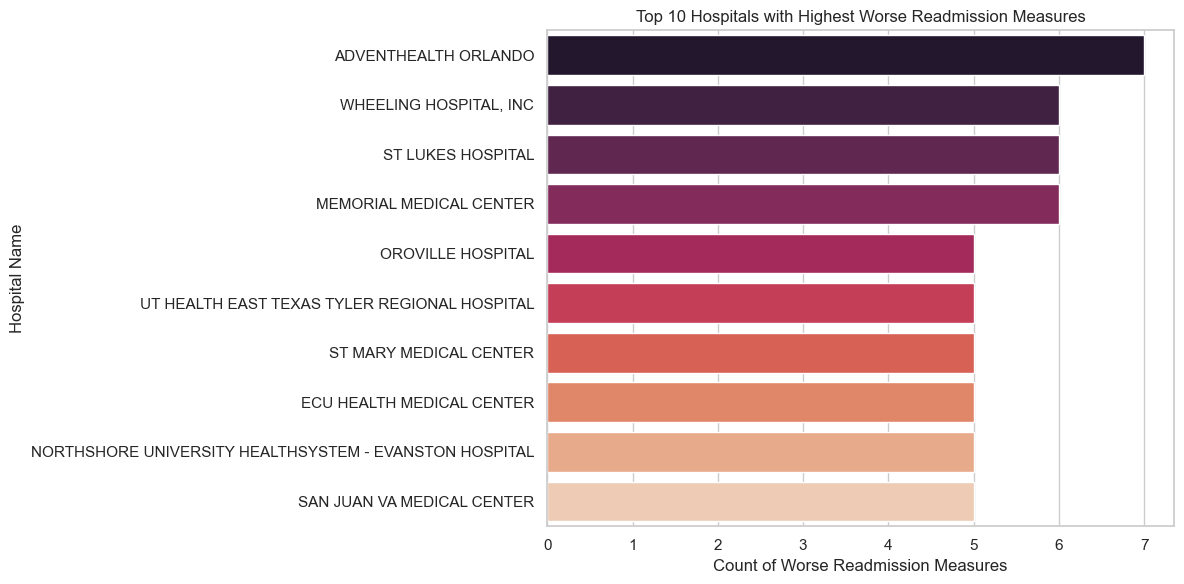

In [22]:
hospital_readmission = df_clean.groupby('facility_name')['count_of_readm_measures_worse'].sum().reset_index()

# Sort and visualize
hospital_readmission = hospital_readmission.sort_values(by='count_of_readm_measures_worse', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(data=hospital_readmission.head(10), x='count_of_readm_measures_worse', y='facility_name', palette='rocket')
plt.title('Top 10 Hospitals with Highest Worse Readmission Measures')
plt.xlabel('Count of Worse Readmission Measures')
plt.ylabel('Hospital Name')
plt.tight_layout()
plt.savefig(r'C:\Users\shazi\Healthcare_Project\output\day5_hospital_readmission_chart.png', dpi=300, bbox_inches='tight')
plt.show()


In [30]:
hospital_readmission.head(10).to_csv('C:/Users/shazi/Healthcare_Project/output/day5_hospital_readmission.csv', index=False)
